In [557]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error,confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pickle

In [493]:
pd.set_option('display.max_columns', None)

In [494]:
df=pd.read_csv('measurements.csv')

### 0. Cleaning the data

In [495]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [497]:
df['refill liters'].value_counts() # we are going to drop this column due to the low amount of values. It is not significant.

37,7    2
45      2
39      2
37,6    1
38,3    1
37      1
41      1
10      1
37,2    1
38      1
Name: refill liters, dtype: int64

In [498]:
df['refill gas'].value_counts() # we are going to drop this column due to the low amount of values. It is not significant.

SP98    8
E10     5
Name: refill gas, dtype: int64

In [499]:
df.drop(columns=['refill liters','refill gas'],inplace=True)

In [500]:
df['gas_type'].value_counts() # More people consumes SP98

SP98    228
E10     160
Name: gas_type, dtype: int64

In [501]:
df=df.rename(columns={"AC":"ac"}) # we rename this column to standarize column names

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   specials      93 non-null     object
 6   gas_type      388 non-null    object
 7   ac            388 non-null    int64 
 8   rain          388 non-null    int64 
 9   sun           388 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 30.4+ KB


In [503]:
df['ac'].value_counts() # this column is already encoded. "1" indicates that air condition was on and "0" tha it was off.

0    358
1     30
Name: ac, dtype: int64

In [504]:
df['rain'].value_counts() # this column is already encoded. "1" indicates that air condition was on and "0" tha it was off.

0    340
1     48
Name: rain, dtype: int64

In [505]:
df['sun'].value_counts() # this column is already encoded. "1" indicates that air condition was on and "0" tha it was off.

0    356
1     32
Name: sun, dtype: int64

In [506]:
df['specials'].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
sun ac                 3
snow                   3
AC sun                 1
AC Sun                 1
ac rain                1
AC snow                1
half rain half sun     1
Name: specials, dtype: int64

*As we can see in the column "specials" there just 93 non-null values, which is very few valuable data. In addition, this information is given in the "rain", "sun" and "ac" columns. The only missing information in these mentioned columns would be for the "snow" and "ac snow" which are 4 observations in total. Therefore, we can directly delete **specials** column and rely on the given information with the combination of the columns **rain, sun** and **ac**.*

In [507]:
df.drop(columns='specials',inplace=True)

In [508]:
# Next we are going to check the values in the "temp_inside" column as there are 12 null values.

In [509]:
df['temp_inside'].value_counts() 

21,5    133
22      102
22,5     59
20       25
21       13
23       13
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

In [512]:
num_cols=['distance','consume','speed','temp_inside','temp_outside']
cat_cols=['gas_type','ac','rain','sun']

In [513]:
df = df[df['temp_inside'].notna()] # we drop the rows that contain nan in the "temp inside" column

In [514]:
df.shape

(376, 9)

In [515]:
df['temp_inside'].value_counts()

21,5    133
22      102
22,5     59
20       25
21       13
23       13
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

In [516]:
for col in num_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(',','.')

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      376 non-null    object
 1   consume       376 non-null    object
 2   speed         376 non-null    object
 3   temp_inside   376 non-null    object
 4   temp_outside  376 non-null    object
 5   gas_type      376 non-null    object
 6   ac            376 non-null    int64 
 7   rain          376 non-null    int64 
 8   sun           376 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 29.4+ KB


In [518]:
df['temp_inside'].value_counts()

21.5    133
22      102
22.5     59
20       25
21       13
23       13
25       12
24.5      7
20.5      4
24        3
25.5      2
23.5      2
19        1
Name: temp_inside, dtype: int64

In [519]:
df['temp_inside']=np.where(df['temp_inside']==np.nan,21.5,df['temp_inside'])

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      376 non-null    object
 1   consume       376 non-null    object
 2   speed         376 non-null    object
 3   temp_inside   376 non-null    object
 4   temp_outside  376 non-null    object
 5   gas_type      376 non-null    object
 6   ac            376 non-null    int64 
 7   rain          376 non-null    int64 
 8   sun           376 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 29.4+ KB


In [521]:
df['gas_type']=np.where(df['gas_type']=='SP98',1,0) # in order to encode the "gas_type" column. SP98=1 and E10=0

In [522]:
df['gas_type'].value_counts()

1    219
0    157
Name: gas_type, dtype: int64

*- Next step will be to convert categorical columns to string*

In [523]:
for cat in cat_cols:
    df[cat]=df[cat].astype('string')

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      376 non-null    object
 1   consume       376 non-null    object
 2   speed         376 non-null    object
 3   temp_inside   376 non-null    object
 4   temp_outside  376 non-null    object
 5   gas_type      376 non-null    string
 6   ac            376 non-null    string
 7   rain          376 non-null    string
 8   sun           376 non-null    string
dtypes: object(5), string(4)
memory usage: 29.4+ KB


In [525]:
for cols in num_cols:
    df[cols]=df[cols].astype('float')

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      376 non-null    float64
 1   consume       376 non-null    float64
 2   speed         376 non-null    float64
 3   temp_inside   376 non-null    float64
 4   temp_outside  376 non-null    float64
 5   gas_type      376 non-null    string 
 6   ac            376 non-null    string 
 7   rain          376 non-null    string 
 8   sun           376 non-null    string 
dtypes: float64(5), string(4)
memory usage: 29.4 KB


In [527]:
df['temp_inside'].value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
23.0     13
21.0     13
25.0     12
24.5      7
20.5      4
24.0      3
25.5      2
23.5      2
19.0      1
Name: temp_inside, dtype: int64

In [528]:
df.drop_duplicates(inplace=True) # just in case there is any duplicated observation

In [529]:
df.describe() # in order to check that all the values, speciall min and max values, make sense.

,distance,consume,speed,temp_inside,temp_outside
count,376.000000,376.000000,376.000000,376.000000,376.000000
mean,19.797340,4.925266,41.957447,21.929521,11.340426
std,22.988878,1.040705,13.714354,1.010455,7.066999
min,1.300000,3.300000,14.000000,19.000000,-5.000000
25%,11.800000,4.300000,32.000000,21.500000,6.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000


### 1. Exploratory Data Analysis (EDA)

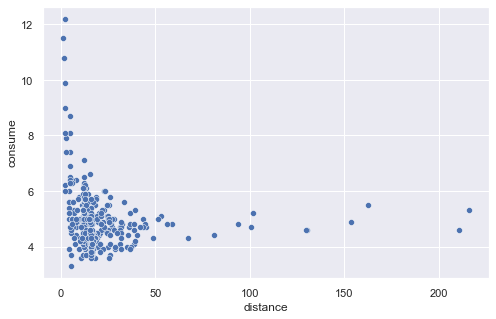

In [530]:
sb.scatterplot(data=df, x="distance", y="consume");

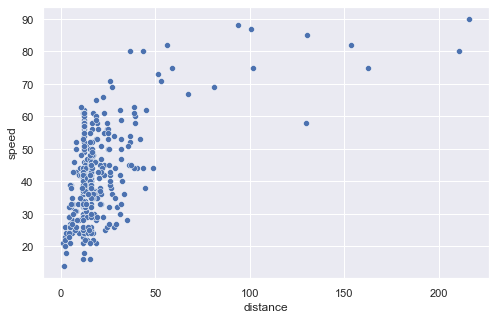

In [531]:
sb.scatterplot(data=df, x="distance", y="speed");

- As we can see above, distance and speed have a certain correlation. The bigger distance the higher speed values.

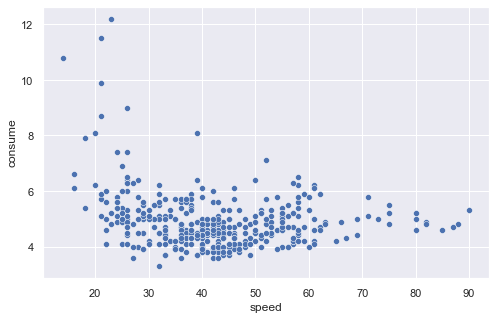

In [532]:
sb.scatterplot(data=df, x="speed", y="consume"); 

- On the plot above it is possible to see that the highest consume values take place at lowest speed.  

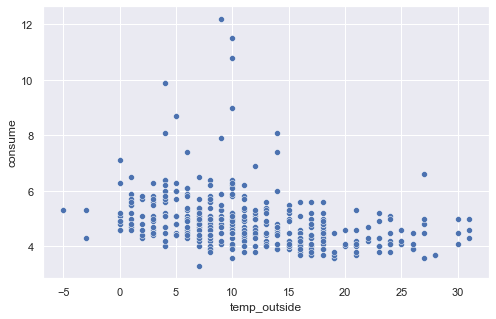

In [533]:
sb.scatterplot(data=df, x="temp_outside", y="consume"); 

- It does not make a lot of sense that the consume is lower with higher temperatures, as refrigerating normally should increase the consume.

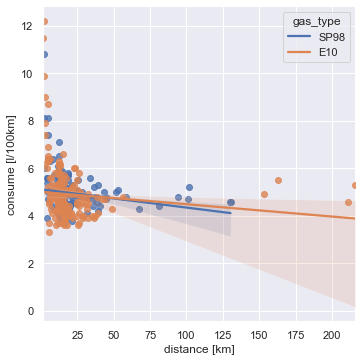

In [534]:
sb.lmplot(data = df, x = 'distance', y = 'consume', hue = 'gas_type',legend=False)
plt.xlabel('distance [km]')
plt.ylabel('consume [l/100km]')
plt.legend(title='gas_type', loc='upper right', labels=['SP98', 'E10']);

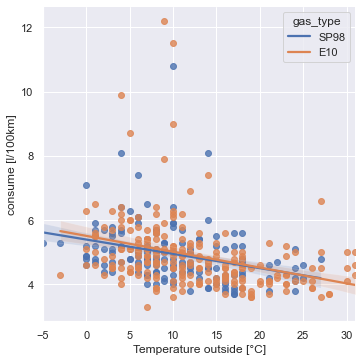

In [535]:
sb.lmplot(data = df, x = 'temp_outside', y = 'consume', hue = 'gas_type',legend=False)
plt.xlabel('Temperature outside [°C]')
plt.ylabel('consume [l/100km]')
plt.legend(title='gas_type', loc='upper right', labels=['SP98', 'E10']);

- The consume is practically the same with the same outside temperature

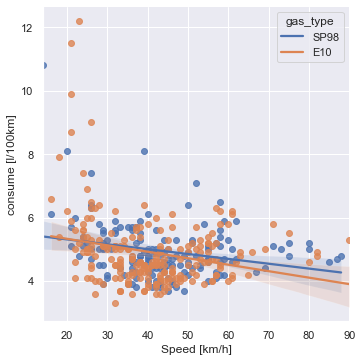

In [536]:
sb.lmplot(data = df, x = 'speed', y = 'consume', hue = 'gas_type',legend=False)
plt.xlabel('Speed [km/h]')
plt.ylabel('consume [l/100km]')
plt.legend(title='gas_type', loc='upper right', labels=['SP98', 'E10']);

- The consume values are pretty similar as well in different speed ranges, even though the consume with SP98 is alway slightly higher except for very low velocity (under 10km/h approximately).

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


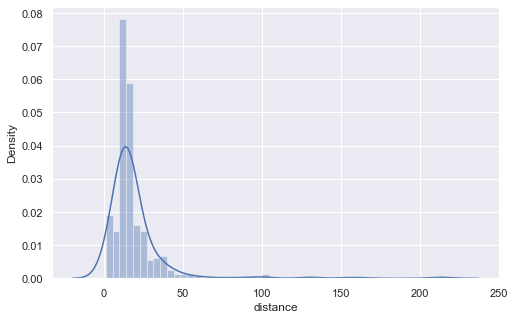

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


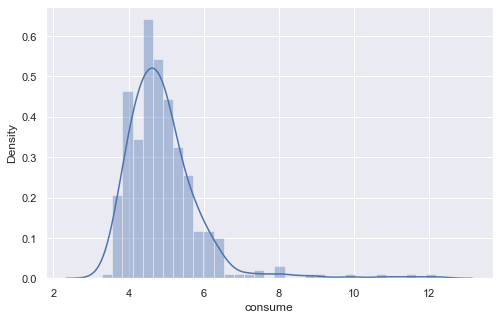

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


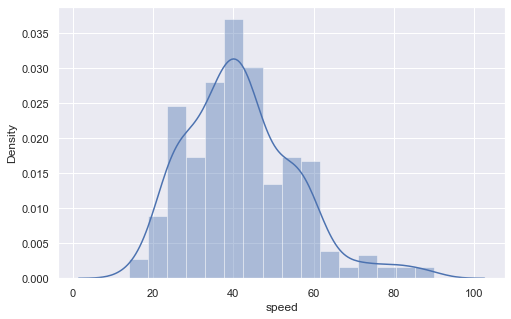

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


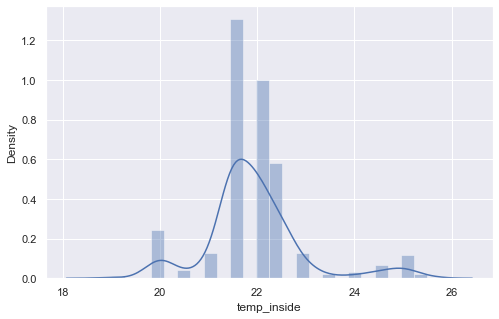

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


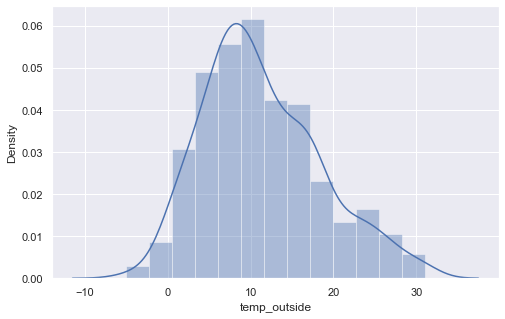

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


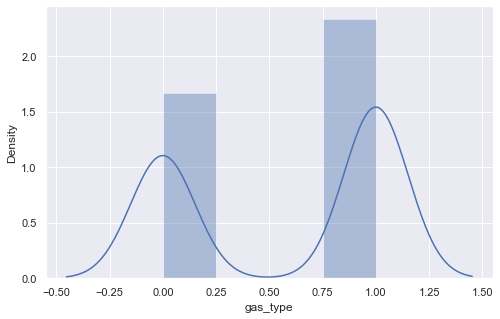

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


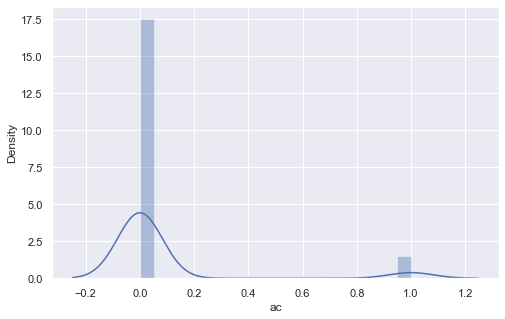

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


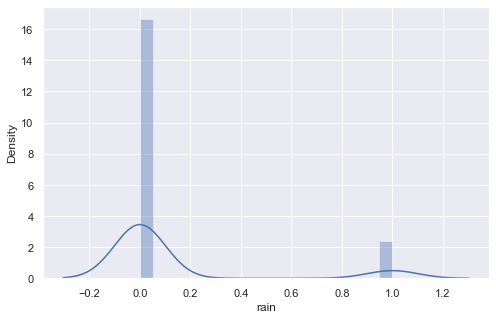

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


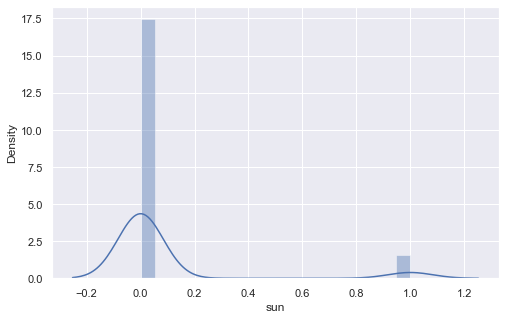

In [537]:
for col in df:
    sb.distplot(df[col])
    plt.show()

- In the distribution plots above it possible to see how the numerical variables have normal distribution or slightly right skwed distribution.

In [538]:
df_num=df[num_cols]
mask = np.zeros_like(df_num.corr())
mask
mask[np.triu_indices_from(mask)] = True 
mask

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


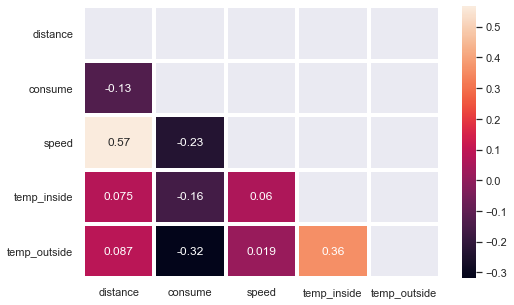

In [539]:

correlations_matrix=df_num.corr()
sb.heatmap(correlations_matrix,sb.set(rc = {'figure.figsize':(8,5)}), linecolor='white', linewidths=3, mask=mask, annot=True)
plt.show()

- Looking at the correlation matrix it is clear that the numeric variables are not very correlated with each other.

### 2. Building a classification model

Based on the data we have, we are going to try to predict which fuel is consumed, hence, we are going to build a classification model.

- The target variable will be 'gas_type'. 1 will be SP98 and 0 E10.
- To build a model we are going to scale the numerical variables.
- Categorical variables are alredy encoded (all of the have just 1 or 0).

In [540]:
y=df['gas_type']
X=df.drop(columns='gas_type')
X_cat=X.select_dtypes('string')
X_num=df[num_cols]

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      376 non-null    float64
 1   consume       376 non-null    float64
 2   speed         376 non-null    float64
 3   temp_inside   376 non-null    float64
 4   temp_outside  376 non-null    float64
 5   gas_type      376 non-null    string 
 6   ac            376 non-null    string 
 7   rain          376 non-null    string 
 8   sun           376 non-null    string 
dtypes: float64(5), string(4)
memory usage: 29.4 KB


In [558]:
scaler=StandardScaler()
scaled=scaler.fit_transform(X_num)
df_num_sc=pd.DataFrame(scaled,columns=X_num.columns) # here we are scaling the numerical variables
filename = 'scaled_model.sav'
pickle.dump(scaled, open(filename, 'wb'))

In [545]:
X_cat.value_counts() # the categorical variables are already encoded

ac  rain  sun
0   0     0      285
    1     0       35
    0     1       26
1   0     0       13
    1     0       12
    0     1        5
dtype: int64

In [559]:
encoder=OneHotEncoder(handle_unknown='error', drop='first')
encoder1=encoder.fit(X_cat)
encoded = encoder1.transform(X_cat).toarray()
filename2 = 'encoder_model.sav'
pickle.dump(encoded, open(filename2, 'wb'))

In [547]:
X_tot=np.concatenate([df_num_sc,encoded], axis=1)

In [548]:
X_train, X_test, y_train, y_test = train_test_split(X_tot, y, test_size=0.3, random_state=42)

In [549]:
y.value_counts()

1    219
0    157
Name: gas_type, dtype: Int64

#### We are going to use SMOTE to balance the data

In [551]:
smote=SMOTE()

In [552]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

0    154
1    154
Name: gas_type, dtype: Int64

### 1. Logistic Regression

In [553]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_sm, y_train_sm)

y_sm_pred_lg = classification.predict(X_test)
print(classification_report(y_test, y_sm_pred_lg))

              precision    recall  f1-score   support

           0       0.49      0.65      0.56        48
           1       0.66      0.51      0.57        65

    accuracy                           0.57       113
   macro avg       0.58      0.58      0.57       113
weighted avg       0.59      0.57      0.57       113



### 2. Decision Tree Classifier

In [555]:
class_dt = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=2, min_samples_leaf=5)   
class_dt.fit(X_train_sm,y_train_sm)

y_pred_dt = class_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57        48
           1       0.69      0.74      0.71        65

    accuracy                           0.65       113
   macro avg       0.65      0.64      0.64       113
weighted avg       0.65      0.65      0.65       113



In [562]:
filename3 = 'finalized_model.sav'
pickle.dump(class_dt, open(filename3, 'wb'))

## CONCLUSIONS

As the metrics above show, the decision tree classifier is much better at predicting the cars that are using E10 gas type as the it is a bit better at predicting the cars that consume SP98 gas type.